# Proyecto Minería de Datos

**Objetivo General:** Crear un modelo con Machine Learning que pronostique tendencias, para relacionar productos que sean ideales para ventas cruzadas, en base a las transacciones de clientes.

**Dataset:** https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository

**Problema:** Para una empresa cualquiera, le es importante mejorar sus ventas o servicios de acuerdo a las necesidades del cliente. Los grandes negocios implementan procesos inteligentes acorde a las acciones de sus clientes, para lograr mejorar sus ingresos, algunos de estos procedimientos están basados en los conocimientos de marketing, Big Data, Smart Data, estadística. Sin embargo para lograr el objetivo de aumentar las ventas, es necesario tener una base de datos de las transacciones realizadas para el análisis de los datos, por tal motivo en este proyecto se enfoca en la creación de un modelo que pueda
predecir tendencias de agrupaciones de productos en base a las compras realizadas por diferentes clientes en una tienda de regalos del Reino Unido entre el 2009 y 2011.

**Tema:** Modelo de pronóstico de tendencias para ventas cruzadas de una tienda de regalos del
Reino Unido entre el 2009 a 2011

# Librerías

In [1]:
# Usada para la importación de los datos
import pandas as pd
# Usada para la graficación
import matplotlib.pyplot as plt
# Usada para la graficación
import seaborn as sns
# La escala para normalización
from sklearn.preprocessing import StandardScaler, RobustScaler
# Para la separación del dataset
from sklearn.model_selection import train_test_split
# Para selección de características
from sklearn.ensemble import RandomForestClassifier
# Para el preprocesamiento de los datos
from sklearn import preprocessing
# Para bining
import numpy as np
# Para onehot encoder
from sklearn.preprocessing import OneHotEncoder
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
#*************MODELOS*************
#árbol de decisión
from sklearn.tree import DecisionTreeClassifier
#SVM
from sklearn import svm
# métricas de rendimiento
from sklearn import metrics
# Para las reglas de asociación
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
!pip install openpyxl

## Carga del dataset

En este apartado se hace un análisis de los datos, para saber si existen datos nulos, el número de registros, distribución de los datos.

**IMPORTACIÓN DEL DATASET**

In [2]:
#Función para la lectura del dataset
def importdata():
    df = pd.read_csv('Year_2009-2011.csv',encoding='unicode_escape')
    print("\n **Estadísticas del dataset:** \n", df.describe().T)
    print("\n **Tamaño del dataset:** \n", df.shape)
    print("\n **Tipos de datos del dataset:** \n", df.dtypes)
    return df

In [3]:
df=importdata()
df


 **Estadísticas del dataset:** 
                  count          mean          std       min       25%      50%       75%      max
Quantity     1033036.0     10.076879   175.197628 -80995.00      1.00      3.0     10.00  80995.0
Price        1033036.0      4.613980   122.397523 -53594.36      1.25      2.1      4.15  38970.0
Customer ID   797885.0  15313.062777  1696.466663  12346.00  13964.00  15228.0  16788.00  18287.0

 **Tamaño del dataset:** 
 (1033036, 8)

 **Tipos de datos del dataset:** 
 Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1033031,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1033032,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1033033,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1033034,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2da06ed90>,
      dtype=object)

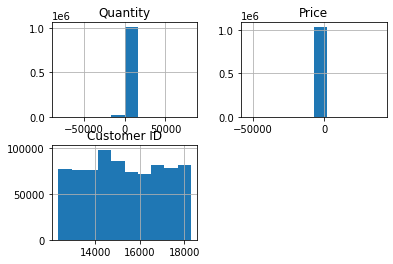

In [4]:
df.hist()

## Verificación y limpieza

**DATOS NULOS**

In [5]:
#Función para ver si existen datos nulos
def datosnull(df):
    existen_bol=1
    total_register=len(df.index)
    total_nan_values = df.isnull().sum().sum()
    existen=total_register-total_nan_values
    vars_with_na=columnan(df)
    if(existen != 0):
        print("\n ** Número de datos nulos: **\n", total_nan_values)
        print("\n ** Columnas con datos nulos: ** \n", df[vars_with_na].dtypes)
        print("\n ** Número de registros finales: ", existen ," registros de: ", len(df), " registros **")
        df=eraseregis(df)
        print(" \n Registros nulos borrados! \n")
        return existen_bol, df        
    else:
        print("\n No existen datos nulos\n ")

In [6]:
#Función para eliminación de registros con datos nulos
def eraseregis(data):
    data = data.dropna()
    return data

In [7]:
# Función para ver las columnas con datos nulos
def columnan(data):
    vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
    return vars_with_na

In [8]:
existen_bol, df_sin_nan=datosnull(df)


 ** Número de datos nulos: **
 239426

 ** Columnas con datos nulos: ** 
 Description     object
Customer ID    float64
dtype: object

 ** Número de registros finales:  793610  registros de:  1033036  registros **
 
 Registros nulos borrados! 



In [9]:
# Creación del dataset solo con United Kingdom
def selecUnitedKingdom(df):
    indices = []
    #df_new = pd.DataFrame()
    for i in df.index: 
         if(df["Country"][i] == "United Kingdom"):
            #df_new.append(df.loc[[i]])
            indices.append(i)
    return indices

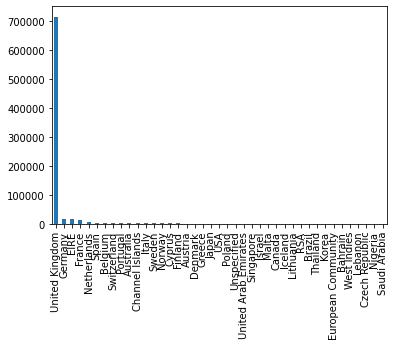

In [10]:
df_sin_nan.Country.value_counts().plot(kind = "bar")

In [11]:
df_united_2=selecUnitedKingdom(df_sin_nan)

In [12]:
df_united = df.iloc[df_united_2]
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1033015,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
1033016,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
1033017,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
1033018,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


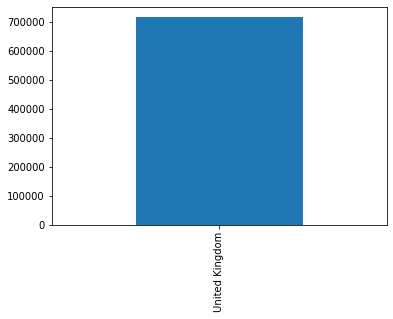

In [13]:
df_united.Country.value_counts().plot(kind = "bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d6201c10>,
      dtype=object)

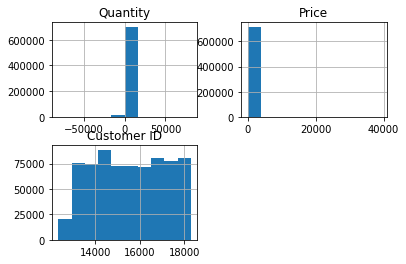

In [14]:
df_united.hist()

In [15]:
# Función que convierte a enteros después de eliminar datos nulos 
def eliminaregistros(x):
    #Elimina los registros que tenga valor NaN
    existen_bol, df_sin_nan = datosnull(x)
    #Convierte a entero
    df_sin_nan=df_sin_nan.astype(int)
    print("Nuevo dataset: \n", df_sin_nan)
    print("Tipos de datos: \n", df_sin_nan.dtypes)
    return df_sin_nan

In [16]:
# Se crea el conteo de los registros repetidos en descripción
dups = df_sin_nan.pivot_table(index=['Description'], aggfunc ='size') 
# Se crea un data frame y se añade la columna 'Repeticion'
gh = pd.DataFrame(dups, columns=['Repeticion'])
# Se observa el número de repeticiones de Descripción en orden
by_repet = gh.sort_values('Repeticion',ascending=False)
by_repet.head(50)

,Repeticion
Description,
WHITE HANGING HEART T-LIGHT HOLDER,5149
REGENCY CAKESTAND 3 TIER,3678
JUMBO BAG RED RETROSPOT,2713
ASSORTED COLOUR BIRD ORNAMENT,2709
PARTY BUNTING,2121
LUNCH BAG BLACK SKULL.,2089
STRAWBERRY CERAMIC TRINKET BOX,2040
POSTAGE,1983
BAKING SET 9 PIECE RETROSPOT,1961


In [17]:
df_united.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [18]:
# Verifica los registros en Invoice que contenga C
# Los registros con C, significan que han sido canceladas, por tal motivo se les borra
verificar = np.where(df_united['Invoice'].str.contains('C', regex=True).tolist())
verificar

(array([   157,    158,    159, ..., 716000, 716001, 716002]),)

In [19]:
verificar2 = df_united.iloc[verificar].index
verificar2

Int64Index([    196,     197,     198,     199,     200,     201,     202,     203,     204,     205,
            ...
            1031275, 1031276, 1031277, 1031555, 1031581, 1031582, 1032674, 1032841, 1032842, 1032843], dtype='int64', length=15681)

In [20]:
df_united.iloc[[157]]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,12/1/2009 10:44,4.25,17592.0,United Kingdom


In [21]:
df_united = df_united.drop(verificar2)

In [22]:
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1033015,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
1033016,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
1033017,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
1033018,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [23]:
# cantidad y precio con valores negativos
verificar_q = np.where(df_united[df_united["Price"] < 0])
verificar_q

(array([], dtype=int64), array([], dtype=int64))

In [24]:
# Escalamiento de valores atípicos
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d802c450>,
      dtype=object)

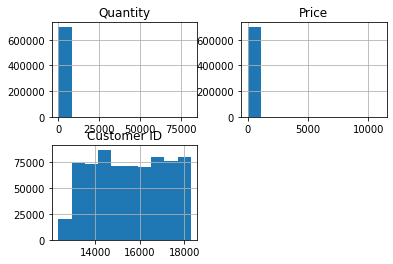

In [25]:
df_united.hist()

In [26]:
def valatipic(df_united):
    replace_with_thresholds(df_united, "Quantity")
    replace_with_thresholds(df_united, "Price")
    return df_united
df = valatipic(df_united)
df.head

<bound method NDFrame.head of         Invoice StockCode                          Description  Quantity      InvoiceDate  Price  Customer ID         Country
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   12/1/2009 7:45   6.95      13085.0  United Kingdom
1        489434    79323P                   PINK CHERRY LIGHTS      12.0   12/1/2009 7:45   6.75      13085.0  United Kingdom
2        489434    79323W                  WHITE CHERRY LIGHTS      12.0   12/1/2009 7:45   6.75      13085.0  United Kingdom
3        489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   12/1/2009 7:45   2.10      13085.0  United Kingdom
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   12/1/2009 7:45   1.25      13085.0  United Kingdom
...         ...       ...                                  ...       ...              ...    ...          ...             ...
1033015  581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT      12.0  12/9/2011 12:3

In [27]:
df_united=valatipic(df_united)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d5ec7c10>,
      dtype=object)

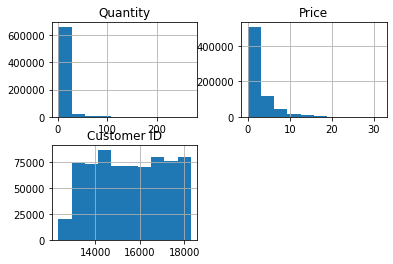

In [28]:
df_united.hist()

In [29]:
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1033015,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,12/9/2011 12:31,1.95,15804.0,United Kingdom
1033016,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8.0,12/9/2011 12:49,2.95,13113.0,United Kingdom
1033017,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,12/9/2011 12:49,1.25,13113.0,United Kingdom
1033018,581586,21217,RED RETROSPOT ROUND CAKE TINS,24.0,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [30]:
df_united.dtypes

Invoice         object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [31]:
# Ver compras por factura
df_united.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"})

Quantity
Invoice Description                                  
489434   WHITE CHERRY LIGHTS                     12.0
        15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0
        FANCY FONT HOME SWEET HOME DOORMAT       10.0
        PINK CHERRY LIGHTS                       12.0
        PINK DOUGHNUT TRINKET POT                24.0
...                                               ...
581585  ZINC WILLIE WINKIE  CANDLE STICK         24.0
581586  DOORMAT RED RETROSPOT                    10.0
        LARGE CAKE STAND  HANGING STRAWBERY       8.0
        RED RETROSPOT ROUND CAKE TINS            24.0
        SET OF 3 HANGING OWLS OLLIE BEAK         24.0

[689730 rows x 1 columns]

In [32]:
# Agrupamiento por desapilamiento
df_united.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().iloc[0:4, 0:4]

Quantity                                                                                        
Description   DOORMAT UNION JACK GUNS AND ROSES  3 STRIPEY MICE FELTCRAFT  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE
Invoice                                                                                                                                
489434                                      NaN                       NaN                            NaN                            NaN
489435                                      NaN                       NaN                            NaN                            NaN
489436                                      NaN                       NaN                            NaN                            NaN
489437                                      NaN                       NaN                            NaN                            NaN

In [33]:
# Agrupamiento colocando ceros
df_united.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:4, 0:4]

Quantity                                                                                        
Description   DOORMAT UNION JACK GUNS AND ROSES  3 STRIPEY MICE FELTCRAFT  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE
Invoice                                                                                                                                
489434                                      0.0                       0.0                            0.0                            0.0
489435                                      0.0                       0.0                            0.0                            0.0
489436                                      0.0                       0.0                            0.0                            0.0
489437                                      0.0                       0.0                            0.0                            0.0

In [34]:
# Llenado de la matriz
df_united.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(
    lambda x: 1 if x > 0 else 0).iloc[0:4, 0:4]

Quantity                                                                                        
Description   DOORMAT UNION JACK GUNS AND ROSES  3 STRIPEY MICE FELTCRAFT  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE
Invoice                                                                                                                                
489434                                        0                         0                              0                              0
489435                                        0                         0                              0                              0
489436                                        0                         0                              0                              0
489437                                        0                         0                              0                              0

In [35]:
def creacionFact(df_united, id=False):
    if id:
        return df_united.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return df_united.groupby(["Invoice", 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

In [36]:
fact_prod = creacionFact(df_united)

fact_prod = creacionFact(df_united, id=True)

In [37]:
fact_prod

StockCode  10002  10080  10109  10120  10123C  10123G  10124A  10124G  10125  10133  10134  10135  10138  11001  15030  15034  15036  15039  15044A  15044B  15044C  15044D  15056BL  15056N  15056P  15058A  15058B  15058C  15059A  15060B  16008  16010  16011  16012  16014  16015  16016  16020C  16033  16043  16044  16045  16046  16047  16048  16049  16050  16051  16052  16053  16054  16119  16151A  16156L  16156N  16156S  16161C  16161E  16161G  16161M  16161P  16161U  16162L  16162M  16168M  16168S  16169A  16169C  16169D  16169E  16169F  16169G  16169K  16169M  16169N  16169P  16201A  16201B  16202A  16202B  16202C  16202E  16206B  16207A  16207B  16212  16215  16216  16218  16219  16225  16235  16236  16237  16238  16239  16243B  16244A  16244B  16245A  16248B  16254  16256B  16256C  16258A  16258B  16259  17001  17003  17007B  17011A  17011B  17011C  17011D  17011E  17011F  17012A  17012B  17012C  17012D  17012E  17012F  17013B  17013C  17013D  17013F  17014A  17014C  17014D  17014E  17014F  17021  17027A  17028J  17033  17038  17039  17061  17084A  17084G  17084J  17084N  17084P  17084R  17090A  17090D  17091A  17091B  17091F  17091J  17096  17107D  17108D  17109A  17109B  17109C  17109D  17129C  17129D  17129F  17136A  17164B  17164D  17165B  17165D  17174  17178  17181  17191A  18007  18010  18094C  18096C  18097A  18097B  18097C  18098A  18098B  18098C  20615  20616  20617  20618  20619  20620  20621  20622  20652  20653  20654  20655  20657  20658  20659  20660  20661  20662  20663  20664  20665  20666  20667  20668  20669  20670  20671  20672  20673  20674  20675  20676  20677  20679  20680  20681  20682  20683  20684  20685  20686  20688  20689  20692  20693  20694  20695  20696  20697  20698  20699  20700  20701  20702  20703  20704  20705  20707  20711  20712  20713  20714  20716  20717  20718  20719  20721  20723  20724  20725  20726  20727  20728  20729  20730  20731  20733  20734  20735  20736  20738  20747  20748  20749  20750  20751  20752  20753  20754  20755  20756  20757  20758  20759  20760  20761  20762  20763  20764  20765  20766  20767  20768  20769  20770  20771  20772  20773  20774  20775  20776  20777  20778  20780  20781  20782  20783  20784  20785  20786  20787  20791  20793  20794  20795  20796  20798  20799  20800  20801  20802  20803  20804  20812  20814  20816  20818  20819  20820  20821  20822  20823  20825  20826  20827  20828  20829  20830  20831  20832  20833  20835  20836  20837  20838  20839  20840  20845  20846  20847  20848  20849  20850  20851  20854  20855  20856  20857  20858  20860  20861  20862  20863  20864  20865  20866  20867  20868  20869  20870  20871  20877  20878  20879  20881  20882  20884  20885  20886  20887  20888  20889  20890  20891  20892  20893  20894  20895  20896  20897  20898  20899  20901  20902  20903  20905  20906  20910  20913  20914  20931  20932  20933  20934  20935  20936  20939  20940  20941  20942  20943  20950  20952  20953  20956  20957  20958  20960  20961  20963  20964  20966  20967  20968  20969  20970  20971  20972  20973  20974  20975  20976  20977  20978  20979  20980  20981  20982  20983  20984  20985  20986  20987  20988  20989  20990  20991  20992  20993  20994  20996  20997  20998  21000  21001  21002  21003  21004  21007  21009  21010  21011  21012  21014  21015  21016  21017  21018  21025  21026  21027  21028  21030  21031  21032  21033  21034  21035  21036  21038  21039  21040  21041  21042  21043  21051  21054  21055  21056  21058  21059  21060  21061  21062  21063  21064  21065  21066  21067  21068  21069  21070  21071  21076  21077  21078  21080  21081  21082  21084  21085  21086  21087  21088  21089  21090  21091  21092  21094  21095  21096  21097  21098  21099  21100  21102  21106  21107  21108  21109  21110  21111  21112  21114  21115  21116  21117  21118  21121  21122  21123  21124  21125  21126  21127  21128  21129  21130  21131  21132  21133  21134  21135  21136  21137  21143  21144  21145  21146  21147  21153  21154  21155  21156 

In [57]:
# Buscar por id
def BuscarID(df_united, codigo):
    nombre_prod = df_united[df_united["StockCode"] == codigo][["Description"]].values[0].tolist()
    print(nombre_prod)

In [58]:
BuscarID(df_united, '85048')

['15CM CHRISTMAS GLASS BALL 20 LIGHTS']


### Asociación

In [59]:
frecuencia = apriori(fact_prod, min_support=0.01, use_colnames=True)

In [60]:
frecuencia

,support,itemsets
0,0.017707,(15036)
1,0.020062,(15056BL)
2,0.022983,(15056N)
3,0.011447,(16156S)
4,0.011447,(16161P)
...,...,...
851,0.014189,"(22698, 22699, 22697)"
852,0.010612,"(82482, 82494L, 82483)"
853,0.010016,"(82482, 82494L, 82486)"
854,0.012788,"(82482, 82494L, 85123A)"


In [61]:
frecuencia.sort_values("support", ascending=False).head(20)

,support,itemsets
545,0.140345,(85123A)
542,0.089012,(85099B)
281,0.085137,(22423)
518,0.074644,(84879)
20,0.068086,(20725)
72,0.063018,(21212)
460,0.057891,(47566)
22,0.056698,(20727)
44,0.054939,(21034)
273,0.054820,(22383)


In [62]:
reglas = association_rules(frecuencia, metric="support", min_threshold=0.01)
reglas.sort_values("support", ascending=False).head(100)

reglas.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
413,(22746),(22748),0.011715,0.015829,0.010463,0.893130,56.423599,0.010278,9.209029
412,(22748),(22746),0.015829,0.011715,0.010463,0.661017,56.423599,0.010278,2.915440
411,(22745),(22748),0.014070,0.015829,0.012013,0.853814,53.939792,0.011791,6.732300
410,(22748),(22745),0.015829,0.014070,0.012013,0.758945,53.939792,0.011791,4.090068
126,(21094),(21086),0.015233,0.013057,0.010106,0.663405,50.809560,0.009907,2.932140
...,...,...,...,...,...,...,...,...,...
170,(21212),(85123A),0.063018,0.140345,0.012222,0.193945,1.381921,0.003378,1.066497
500,(85123A),(85099B),0.140345,0.089012,0.016813,0.119796,1.345840,0.004320,1.034974
501,(85099B),(85123A),0.089012,0.140345,0.016813,0.188881,1.345840,0.004320,1.059839
358,(85123A),(22423),0.140345,0.085137,0.013802,0.098343,1.155120,0.001853,1.014647


In [63]:
total_confidence=reglas['confidence'].sum().sum()/len(reglas['confidence'])
total_support=reglas['support'].sum().sum()/reglas.shape[0]
print("Confidencia media: ", total_confidence)
print("Soporte medio: ",total_support)

Confidencia media:  0.389374561660057
Soporte medio:  0.013452388917629728


In [64]:
print("Minimo de confidencia: ",reglas['confidence'].min(), " || Máximo de confidencia: ", reglas['confidence'].max())
print("Minimo de soporte: ",reglas['support'].min(), " || Máximo de soporte: ", reglas['support'].max())

Minimo de confidencia:  0.07158028887000849  || Máximo de confidencia:  0.8931297709923665
Minimo de soporte:  0.010016097299230907  || Máximo de soporte:  0.03267155547606272


In [65]:
reglas.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,0.044029,0.044029,0.013452,0.389375,11.470128,0.011500,1.760142
std,0.027434,0.027434,0.003767,0.175841,8.414784,0.003641,0.802172
min,0.011715,0.011715,0.010016,0.071580,1.155120,0.001853,1.014647
25%,0.024086,0.024086,0.010881,0.243130,7.428638,0.009649,1.271127
50%,0.039707,0.039707,0.012401,0.383852,9.831741,0.010915,1.542305
75%,0.051273,0.051273,0.014189,0.525959,11.970360,0.012483,2.003460
max,0.140345,0.140345,0.032672,0.893130,56.423599,0.026514,9.209029


In [66]:
def fun_recomienda(reglas, productoID, conteo_recomen=1):
    orden_reglas = reglas.sort_values("lift", ascending=False)
    listado_recomen = []
    for i, producto in enumerate(orden_reglas["antecedents"]):
        for j in list(producto):
            if j == productoID:
                listado_recomen.append(list(orden_reglas.iloc[i]["consequents"])[0])

    return listado_recomen[0:conteo_recomen]

In [79]:
fun_recomienda(reglas, '85123A', 2)

['82482', '82494L']

In [74]:
BuscarID(df_united, '82494L')

['WOODEN FRAME ANTIQUE WHITE ']


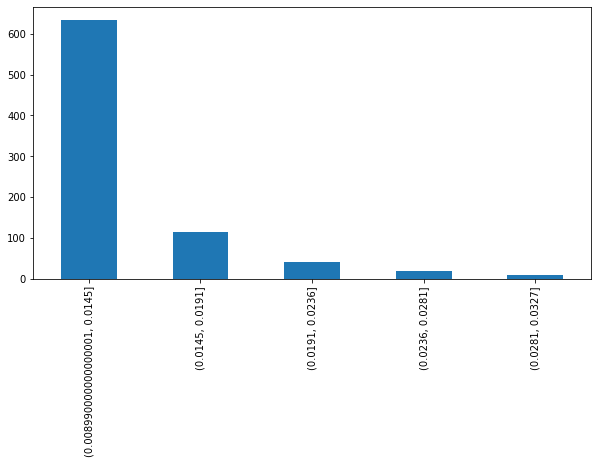

In [94]:
reglas.support.value_counts(bins=5).plot(kind = "bar", figsize=(10,5))

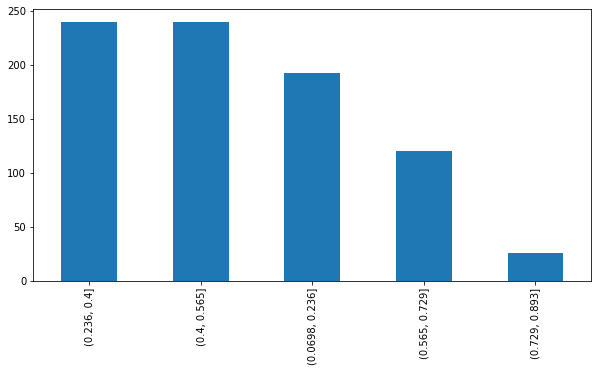

In [95]:
reglas.confidence.value_counts(bins=5).plot(kind = "bar", figsize=(10,5))

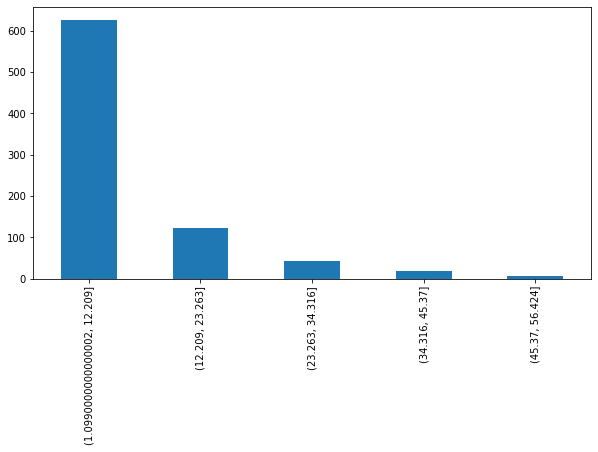

In [96]:
reglas.lift.value_counts(bins=5).plot(kind = "bar", figsize=(10,5))

In [ ]:
reglas.support.value_counts().plot(kind = "bar", figsize=(50,5))